## Load data
有dictionary 文档。

当时得奖的方案有：
* DocSpot认为，“正确”的护理对每个人而言意味着完全不同的事物，并且医生与患者一样多层面。考虑到这一点，我们开发了多种创新方式，供用户搜索，过滤和选择适合自己独特需求的提供商。DocSpot提供的信息使每个用户都能快速找到适合其个人需求的提供者。
* 纽约州医疗保健消费者的HealthRank，能够确定最能满足其个人健康需求的医院。HealthRank使用OPEN NY提供的公开医院住院病人出院数据来提供易于使用，可自定义的医院排名列表，这可以使纽约人能够自己做出更明智的医疗决策。
* 基于地图的搜索工具，可根据客户的偏好（例如成本，距离和质量）在该地区找到医院。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
ls gdrive/My\ Drive/BigData/Project/Data

In [ ]:
data2017 = pd.read_csv('/content/gdrive/My Drive/BigData/Project/Data/SPARCS-2017.csv', encoding = "ISO-8859-1")
data2017.head()

## 2. EDA

In [3]:
np.shape(data2017)

(2343569, 34)

In [4]:
data2017.dtypes

Hospital Service Area                   object
Hospital County                         object
Operating Certificate Number           float64
Permanent Facility Id                  float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [5]:
data2017.count()

Hospital Service Area                  2338414
Hospital County                        2338414
Operating Certificate Number           2338414
Permanent Facility Id                  2338414
Facility Name                          2343569
Age Group                              2343569
Zip Code - 3 digits                    2304550
Gender                                 2343569
Race                                   2343569
Ethnicity                              2343569
Length of Stay                         2343569
Type of Admission                      2343569
Patient Disposition                    2343569
Discharge Year                         2343569
CCS Diagnosis Code                     2343569
CCS Diagnosis Description              2343569
CCS Procedure Code                     2343569
CCS Procedure Description              2343569
APR DRG Code                           2343569
APR DRG Description                    2343569
APR MDC Code                           2343569
APR MDC Descr

Some of the data are missing, especially "Payment Typology 2" and "Payment Typology 3".
Maybe we could discard null records for other columns

In [6]:
data2017.nunique()

Hospital Service Area                        8
Hospital County                             57
Operating Certificate Number               174
Permanent Facility Id                      211
Facility Name                              211
Age Group                                    5
Zip Code - 3 digits                         50
Gender                                       3
Race                                         4
Ethnicity                                    4
Length of Stay                             120
Type of Admission                            6
Patient Disposition                         20
Discharge Year                               1
CCS Diagnosis Code                         263
CCS Diagnosis Description                  263
CCS Procedure Code                         224
CCS Procedure Description                  224
APR DRG Code                               320
APR DRG Description                        320
APR MDC Code                                26
APR MDC Descr

### Distribution of column values

In [25]:
set(data2017["Hospital Service Area"])

{'Capital/Adirond',
 'Central NY',
 'Finger Lakes',
 'Hudson Valley',
 'Long Island',
 'New York City',
 'Southern Tier',
 'Western NY',
 nan}

Text(0.5, 1.0, 'Hospital Service Area (NY state)')

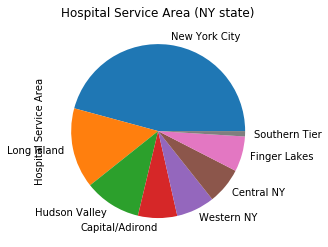

In [26]:
data2017["Hospital Service Area"].value_counts().plot.pie()
plt.title("Hospital Service Area (NY state)")

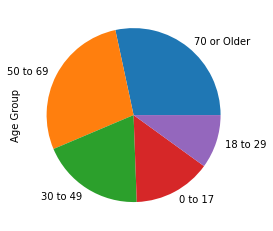

In [11]:
data2017["Age Group"].value_counts().plot(kind="pie")

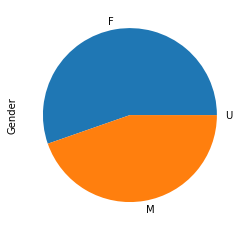

In [12]:
data2017["Gender"].value_counts().plot(kind="pie")

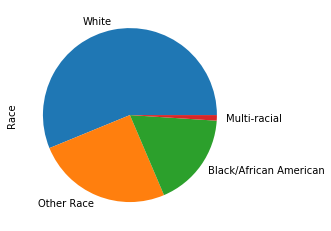

In [13]:
data2017["Race"].value_counts().plot(kind="pie")

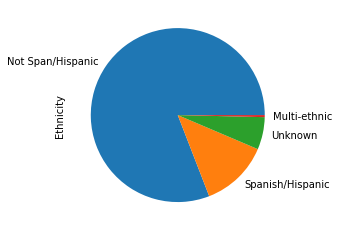

In [14]:
data2017["Ethnicity"].value_counts().plot(kind="pie")

Text(0.5, 1.0, 'Type of Admission')

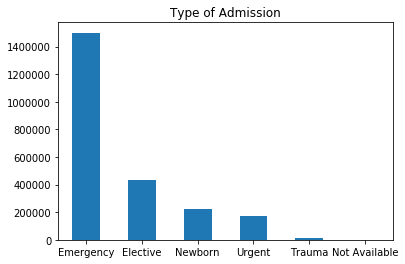

In [15]:
data2017["Type of Admission"].value_counts().plot(kind="bar",rot=0)
plt.title("Type of Admission")

Text(0.5, 1.0, 'APR Severity of Illness Description')

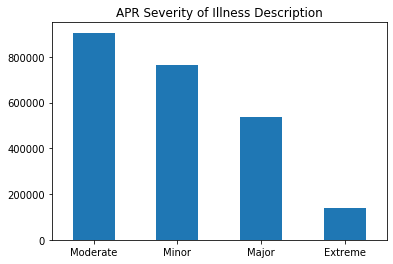

In [16]:
data2017["APR Severity of Illness Description"].value_counts().plot(kind="bar",rot=0)
plt.title("APR Severity of Illness Description")

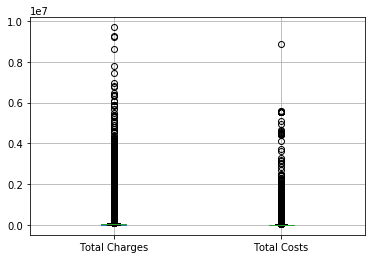

In [17]:
data2017.boxplot(column=['Total Charges','Total Costs'])

Text(0.5, 1.0, 'Distribution of costs')

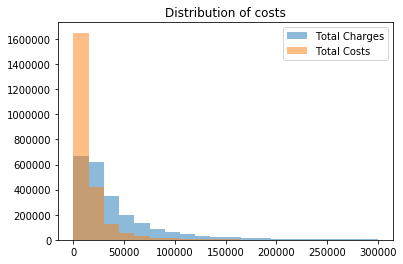

In [18]:
import matplotlib.pyplot as plt
plt.hist(data2017["Total Charges"],bins=20,range=(0,300000),alpha=0.5,label="Total Charges")
plt.hist(data2017["Total Costs"],bins=20,range=(0,300000),alpha=0.5,label="Total Costs")
plt.legend()
plt.title("Distribution of costs")

Text(0.5, 1.0, 'Length of Stay (Top 8)')

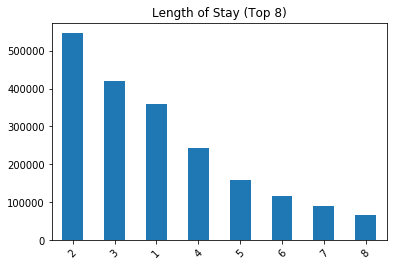

In [19]:
data2017["Length of Stay"].value_counts()[:8].plot(kind="bar",rot=45)
plt.title("Length of Stay (Top 8)")

Text(0.5, 1.0, 'Hospital County (Top 8)')

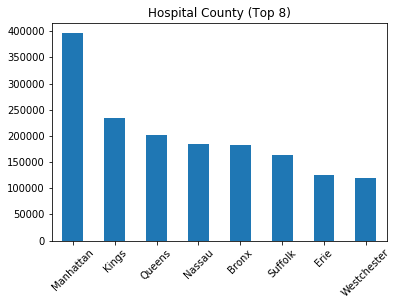

In [20]:
data2017["Hospital County"].value_counts()[:8].plot(kind="bar",rot=45)
plt.title("Hospital County (Top 8)")

Text(0.5, 1.0, 'Facility Name (Top 8)')

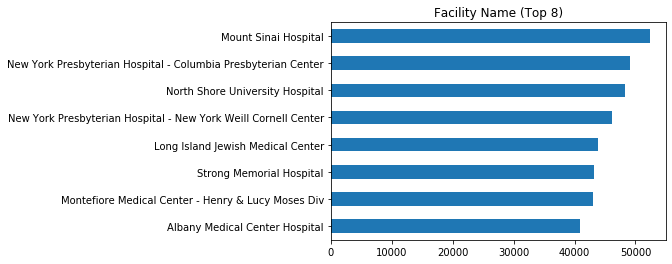

In [21]:
data2017["Facility Name"].value_counts()[::-1][-8:].plot.barh()
plt.title("Facility Name (Top 8)")